# Project: Map a depth survey
## Author: André Santos

## Referências

https://www.sdss.org/dr14/manga/manga-tutorials/manga-faq/#WhydoyououtputIVAR(inversevariance)insteadoferrors

https://www.legacysurvey.org/dr9/catalogs/

https://www.legacysurvey.org/dr9/description/

https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/

além das documentações oficiais do numpy, pandas, matplotlib, astropy e os.

## 1) Importanto as bibliotecas necessárias

In [1]:
# Importações iniciais

from astropy.io import fits  # para manipular arquivos fits
from astropy.table import Table  # tranformar arquivos .fits em Tabela
import numpy as np  # computação numérica em geral
import matplotlib.pyplot as plt  # para plots
import pandas as pd  # para análise de dados em geral

## 2 ) Importando o catálogo completo filtrado

In [2]:
hdul = fits.open('sweep_complete.fits')  # abre o arquivo .fits
data = hdul[1].data  # pega os dados
data_table = Table(data)  # transforma os dados em tabela

df = data_table.to_pandas()  # transforma a tabela em pandas.DatFrame
df  # exibe o DataFrame

,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4
0,14.240753,28.847128,0.0,0.0,3.133072,13.358191,7.873888,-38.988129,-245.607864,0.0,0.0,13.087370,3.184460,0.736044,0.001108,0.000014
1,14.241112,28.769650,0.0,0.0,10.574547,11.819994,10.949125,63.857544,124.859245,0.0,0.0,8.094687,3.153476,0.701215,0.000948,0.000012
2,14.241291,28.826563,0.0,0.0,1.967311,11.562284,6.289454,18.252851,-864.666504,0.0,0.0,21.511547,3.019433,0.728921,0.001104,0.000014
3,14.241557,28.776140,0.0,0.0,2.132857,3.498334,-0.083196,21.519545,-711.413757,0.0,0.0,20.894403,3.725887,0.793164,0.001001,0.000013
4,14.242632,28.833243,0.0,0.0,222.541992,190.521561,119.021629,445.431458,219.226013,0.0,0.0,1.181728,0.955762,0.319255,0.000698,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14681271,26.040316,29.158024,0.0,0.0,1.835453,4.408660,0.834486,7.355913,-656.971130,0.0,0.0,21.583042,3.505299,0.762935,0.001620,0.000022
14681272,26.040434,29.183517,0.0,0.0,3.482619,19.406654,15.804178,39.744762,1023.387268,0.0,0.0,15.512449,2.912554,0.690758,0.001667,0.000022
14681273,26.040688,29.238769,0.0,0.0,17.140209,21.996750,13.091430,-6.884120,-229.643143,0.0,0.0,14.020750,2.878304,0.720042,0.001780,0.000024
14681274,26.041075,29.318184,0.0,0.0,824.459961,314.588470,167.683258,12.300193,95.669662,0.0,0.0,0.015519,0.953652,0.433887,0.001613,0.000022


## 3) Filtrando os fluxos negativos e nulos

In [3]:
cores = ['R', 'G', 'Z', 'W1', 'W2', 'W3', 'W4']
colunas_flux = ['FLUX_'+cor for cor in cores]  # out: ['FLUX_R', 'FLUX_G', ... , 'FLUX_W4']

# Elimina os fluxos de valores negativos e nulos
for cor in colunas_flux:
    conditions = df[cor] <= 0
    index_names = df[conditions].index
    df.drop(index_names, inplace=True)
    
df

,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4
107174,107.750869,36.739924,219.684952,338.821106,392.555969,101.683540,53.451988,22.691908,482.367157,78.711571,31.975475,3.933142,1.658296,0.558353,0.000819,0.000011
107187,107.751373,36.777290,1784.844116,1038.374634,4161.297852,1822.707886,966.120178,257.936798,931.429749,0.012285,1.452060,0.015073,0.226496,0.148580,0.000820,0.000011
107192,107.751823,36.669338,1.279869,3.337096,8.894435,34.525002,20.323212,69.838181,264.740234,563.895203,215.382309,59.415070,2.393535,0.648620,0.000740,0.000010
107197,107.752302,36.627326,0.123152,0.303891,0.456345,19.265203,6.208516,47.048626,196.865555,924.004150,356.157684,159.471329,2.832207,0.713194,0.000754,0.000010
107204,107.752591,36.758500,0.461379,0.720366,2.041604,6.733374,6.964497,16.834921,543.709351,820.511719,347.422516,91.921669,2.986385,0.687811,0.000804,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593997,36.498539,1.025276,0.218378,0.556321,1.883117,4.362067,10.070958,37.343235,83.625023,334.477478,157.553207,22.118040,2.710324,0.611574,0.001432,0.000020
14594009,36.499245,1.117772,0.548639,2.726423,6.835315,11.650385,6.204290,12.480967,298.953369,1065.523560,494.752411,80.066101,3.045109,0.711562,0.001456,0.000020
14594018,36.499591,0.920675,0.280877,0.591649,0.922873,6.795682,9.077318,93.370674,566.822327,714.691711,337.173767,29.637829,2.893299,0.657473,0.001428,0.000019
14594022,36.499655,0.895733,0.613180,1.619501,2.849022,5.631150,4.376112,45.405254,169.230591,901.798462,437.225922,15.227472,3.130150,0.693037,0.001345,0.000019


## 4) Obtendo as magnitudes (AB System) a partir do fluxo

$$m = 22.5-2.5log_{10}(FLUX)$$

In [4]:
colors = ['R', 'G', 'Z', 'W1', 'W2', 'W3', 'W4']
flux_columns = ['FLUX_'+color for color in colors]
mag_columns = ['MAG_'+color for color in colors]

#  Adiciona as colunas de magnitude com o cálculo acima
for i in range(len(mag_columns)):
    df[mag_columns[i]] = 22.5 - 2.5 * np.log10(df[flux_columns[i]])
    
df

,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,...,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MAG_R,MAG_G,MAG_Z,MAG_W1,MAG_W2,MAG_W3,MAG_W4
107174,107.750869,36.739924,219.684952,338.821106,392.555969,101.683540,53.451988,22.691908,482.367157,78.711571,...,0.558353,0.000819,0.000011,16.175074,16.645499,16.015246,17.481874,18.180090,19.110323,15.791556
107187,107.751373,36.777290,1784.844116,1038.374634,4161.297852,1822.707886,966.120178,257.936798,931.429749,0.012285,...,0.148580,0.000820,0.000011,14.959115,14.370999,13.451928,14.348207,15.037422,16.471217,15.077125
107192,107.751823,36.669338,1.279869,3.337096,8.894435,34.525002,20.323212,69.838181,264.740234,563.895203,...,0.648620,0.000740,0.000010,21.191578,22.232086,20.127204,18.654666,19.230019,17.889768,16.442950
107197,107.752302,36.627326,0.123152,0.303891,0.456345,19.265203,6.208516,47.048626,196.865555,924.004150,...,0.713194,0.000754,0.000010,23.793205,24.773893,23.351768,19.288066,20.517530,18.318633,16.764576
107204,107.752591,36.758500,0.461379,0.720366,2.041604,6.733374,6.964497,16.834921,543.709351,820.511719,...,0.687811,0.000804,0.000011,22.856117,23.339856,21.725071,20.429418,20.392776,19.434472,15.661583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593997,36.498539,1.025276,0.218378,0.556321,1.883117,4.362067,10.070958,37.343235,83.625023,334.477478,...,0.611574,0.001432,0.000020,23.136686,24.151977,21.812807,20.900769,19.992323,18.569470,17.694159
14594009,36.499245,1.117772,0.548639,2.726423,6.835315,11.650385,6.204290,12.480967,298.953369,1065.523560,...,0.711562,0.001456,0.000020,21.411017,23.151782,20.413104,19.834149,20.518270,19.759379,16.310991
14594018,36.499591,0.920675,0.280877,0.591649,0.922873,6.795682,9.077318,93.370674,566.822327,714.691711,...,0.657473,0.001428,0.000019,23.069839,23.878709,22.587145,20.419417,20.105106,17.574474,15.616382
14594022,36.499655,0.895733,0.613180,1.619501,2.849022,5.631150,4.376112,45.405254,169.230591,901.798462,...,0.693037,0.001345,0.000019,21.976547,23.031030,21.363261,20.623507,20.897279,18.357235,16.928803


## 5) Plot dos histograma das magnitudes

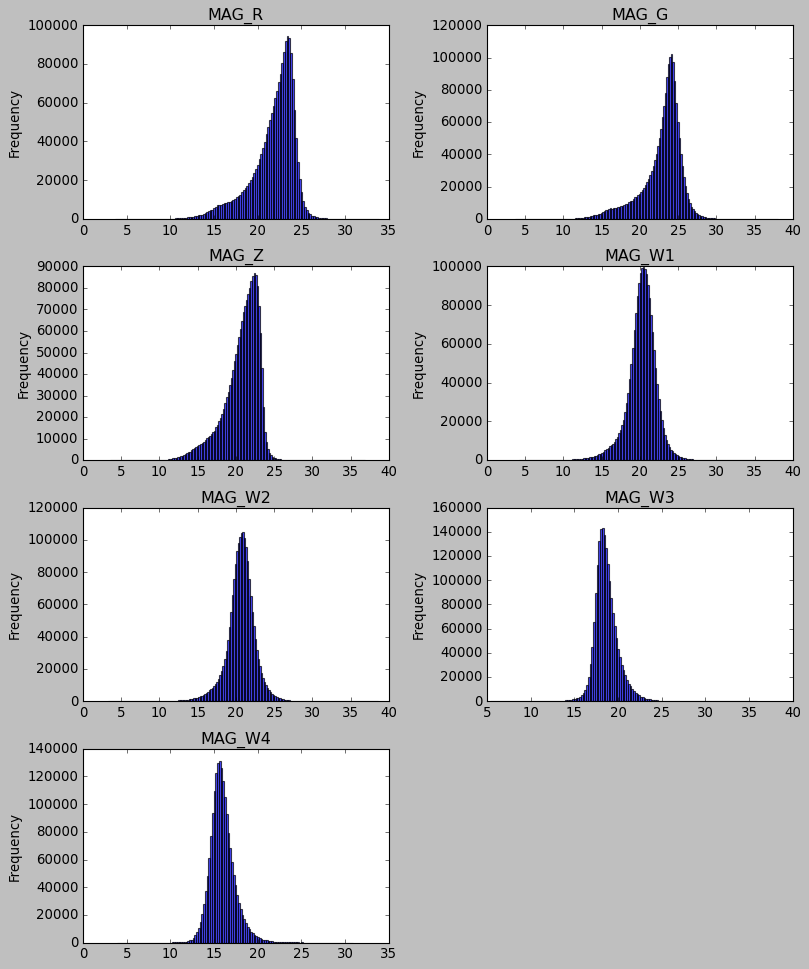

In [5]:
hor = 2
ver = 4

plt.style.use('classic')

# constrained_layout = True evita que as legendas e os títulos dos subplots se sobreponham

fig = plt.figure(figsize=(10, 12), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.1, right=0.5, wspace=0.1)

binsize = .2  # intervalo de cada bin

# Função para auxiliar no número de bins
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)



# Gerando o plot das magnitudes
i = 0

for v in range(ver):
    for h in range(hor):
        if i >= len(colors):
            break
        
        color = colors[i]
        mag_column='MAG_'+color
        
        fig.add_subplot(gs[v, h])
        bins0 = binarange(df[mag_column], binsize)
        ax = df[mag_column].plot.hist(bins=bins0, color='blue', alpha=0.7, label=mag_column)
        ax.set_title(mag_column)
        
        i += 1

## 6) Obtendo o erro das magnitudes a partir de IVAR_FLUX

In [6]:
ivar_flux_columns = [ 'IVAR_FLUX_'+color for color in colors]

ivar_mag_columns = ['IVAR_MAG_'+color for color in colors]

\begin{gather}
m = 22.5 - 2.5log_{10}(F) \\
\sigma_m = \sigma_F\left(\frac{\partial m}{\partial F}\right) \\
\sigma_m = \sigma_F\left(\frac{2.5}{F\ln10}\right) \\
\sigma_m = 1.087\left(\frac{\sigma_F}{F}\right) \\
\sigma_m = \frac{1.087}{F \cdot \sqrt{IVAR\_FLUX}}
\end{gather}

In [7]:
colors = ['R', 'G', 'Z', 'W1', 'W2', 'W3', 'W4']

flux_ivar_columns = [ 'FLUX_IVAR_'+color for color in colors]
mag_Err_columns = ['MAGErr_'+color for color in colors]

for i in range(len(mag_columns)):
    df[mag_Err_columns[i]] = 1.087 / (df[flux_columns[i]] * np.sqrt(df[flux_ivar_columns[i]]) )
    
df

,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,...,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,MAGErr_G,MAGErr_Z,MAGErr_W1,MAGErr_W2,MAGErr_W3,MAGErr_W4
107174,107.750869,36.739924,219.684952,338.821106,392.555969,101.683540,53.451988,22.691908,482.367157,78.711571,...,18.180090,19.110323,15.791556,0.000567,0.000558,0.001396,0.008301,0.027215,1.673868,0.689029
107187,107.751373,36.777290,1784.844116,1038.374634,4161.297852,1822.707886,966.120178,257.936798,931.429749,0.012285,...,15.037422,16.471217,15.077125,0.000869,0.005495,0.002128,0.001253,0.002919,0.147127,0.354271
107192,107.751823,36.669338,1.279869,3.337096,8.894435,34.525002,20.323212,69.838181,264.740234,563.895203,...,19.230019,17.889768,16.442950,0.022195,0.035766,0.015855,0.020351,0.066411,0.572117,1.308772
107197,107.752302,36.627326,0.123152,0.303891,0.456345,19.265203,6.208516,47.048626,196.865555,924.004150,...,20.517530,18.318633,16.764576,0.189535,0.290369,0.188623,0.033527,0.207318,0.841502,1.745022
107204,107.752591,36.758500,0.461379,0.720366,2.041604,6.733374,6.964497,16.834921,543.709351,820.511719,...,20.392776,19.434472,15.661583,0.080956,0.082249,0.055533,0.093417,0.188194,2.277806,0.608286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593997,36.498539,1.025276,0.218378,0.556321,1.883117,4.362067,10.070958,37.343235,83.625023,334.477478,...,19.992323,18.569470,17.694159,0.155665,0.272168,0.122738,0.151365,0.138018,0.769194,2.907932
14594009,36.499245,1.117772,0.548639,2.726423,6.835315,11.650385,6.204290,12.480967,298.953369,1065.523560,...,20.518270,19.759379,16.310991,0.017924,0.060696,0.017772,0.053467,0.207697,2.282487,0.820544
14594018,36.499591,0.920675,0.280877,0.591649,0.922873,6.795682,9.077318,93.370674,566.822327,714.691711,...,20.105106,17.574474,15.616382,0.100055,0.144762,0.216354,0.094037,0.147684,0.308126,0.442460
14594022,36.499655,0.895733,0.613180,1.619501,2.849022,5.631150,4.376112,45.405254,169.230591,901.798462,...,20.897279,18.357235,16.928803,0.032099,0.059032,0.097773,0.109106,0.298375,0.652879,1.480076


## 8) Removendo índices com MAGErr = inf

In [8]:
colors = ['R', 'G', 'Z', 'W1', 'W2', 'W3', 'W4']
mag_err_columns = ['MAGErr_'+cor for cor in cores]

for color in mag_err_columns:
    conditions = df[color] == float('inf')
    index_names = df[conditions].index
    df.drop(index_names, inplace=True)
    
df

,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,...,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,MAGErr_G,MAGErr_Z,MAGErr_W1,MAGErr_W2,MAGErr_W3,MAGErr_W4
107174,107.750869,36.739924,219.684952,338.821106,392.555969,101.683540,53.451988,22.691908,482.367157,78.711571,...,18.180090,19.110323,15.791556,0.000567,0.000558,0.001396,0.008301,0.027215,1.673868,0.689029
107187,107.751373,36.777290,1784.844116,1038.374634,4161.297852,1822.707886,966.120178,257.936798,931.429749,0.012285,...,15.037422,16.471217,15.077125,0.000869,0.005495,0.002128,0.001253,0.002919,0.147127,0.354271
107192,107.751823,36.669338,1.279869,3.337096,8.894435,34.525002,20.323212,69.838181,264.740234,563.895203,...,19.230019,17.889768,16.442950,0.022195,0.035766,0.015855,0.020351,0.066411,0.572117,1.308772
107197,107.752302,36.627326,0.123152,0.303891,0.456345,19.265203,6.208516,47.048626,196.865555,924.004150,...,20.517530,18.318633,16.764576,0.189535,0.290369,0.188623,0.033527,0.207318,0.841502,1.745022
107204,107.752591,36.758500,0.461379,0.720366,2.041604,6.733374,6.964497,16.834921,543.709351,820.511719,...,20.392776,19.434472,15.661583,0.080956,0.082249,0.055533,0.093417,0.188194,2.277806,0.608286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593997,36.498539,1.025276,0.218378,0.556321,1.883117,4.362067,10.070958,37.343235,83.625023,334.477478,...,19.992323,18.569470,17.694159,0.155665,0.272168,0.122738,0.151365,0.138018,0.769194,2.907932
14594009,36.499245,1.117772,0.548639,2.726423,6.835315,11.650385,6.204290,12.480967,298.953369,1065.523560,...,20.518270,19.759379,16.310991,0.017924,0.060696,0.017772,0.053467,0.207697,2.282487,0.820544
14594018,36.499591,0.920675,0.280877,0.591649,0.922873,6.795682,9.077318,93.370674,566.822327,714.691711,...,20.105106,17.574474,15.616382,0.100055,0.144762,0.216354,0.094037,0.147684,0.308126,0.442460
14594022,36.499655,0.895733,0.613180,1.619501,2.849022,5.631150,4.376112,45.405254,169.230591,901.798462,...,20.897279,18.357235,16.928803,0.032099,0.059032,0.097773,0.109106,0.298375,0.652879,1.480076


## 9) Observando e removendo outliers de MAGErr

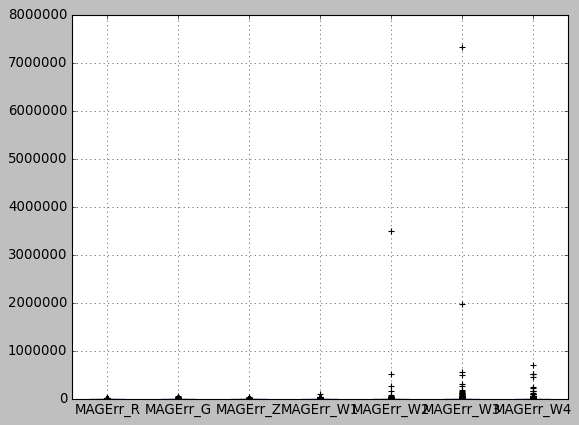

In [9]:
df.boxplot(mag_err_columns);

In [10]:
colors = ['R', 'G', 'Z', 'W1', 'W2', 'W3', 'W4']
mag_err_columns = ['MAGErr_'+cor for cor in cores]

for mag_err_column in mag_err_columns:

    Q1 = df[mag_err_column].quantile(.25)  # primeiro quantil
    Q3 = df[mag_err_column].quantile(.75)  # terceiro quantil
    IIQ = Q3 - Q1  # Intervalo Inter Quantil

    limite_inferior = Q1 - 1.5 * IIQ  # Limite inferior para os valores
    limite_superior = Q3 + 1.5 * IIQ  # Limite superior para os valores


    inside_limit = ~((df[mag_err_column] >= limite_inferior) & (df[mag_err_column] <= limite_superior))
    index_names = df[inside_limit].index
    df.drop(index_names, inplace=True)  # elimina os índices que satisfazem a condição inside_limit.
    

        
df  # exibe o novo dataframe

,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,...,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,MAGErr_G,MAGErr_Z,MAGErr_W1,MAGErr_W2,MAGErr_W3,MAGErr_W4
107174,107.750869,36.739924,219.684952,338.821106,392.555969,101.683540,53.451988,22.691908,482.367157,78.711571,...,18.180090,19.110323,15.791556,0.000567,0.000558,0.001396,0.008301,0.027215,1.673868,0.689029
107187,107.751373,36.777290,1784.844116,1038.374634,4161.297852,1822.707886,966.120178,257.936798,931.429749,0.012285,...,15.037422,16.471217,15.077125,0.000869,0.005495,0.002128,0.001253,0.002919,0.147127,0.354271
107192,107.751823,36.669338,1.279869,3.337096,8.894435,34.525002,20.323212,69.838181,264.740234,563.895203,...,19.230019,17.889768,16.442950,0.022195,0.035766,0.015855,0.020351,0.066411,0.572117,1.308772
107197,107.752302,36.627326,0.123152,0.303891,0.456345,19.265203,6.208516,47.048626,196.865555,924.004150,...,20.517530,18.318633,16.764576,0.189535,0.290369,0.188623,0.033527,0.207318,0.841502,1.745022
107204,107.752591,36.758500,0.461379,0.720366,2.041604,6.733374,6.964497,16.834921,543.709351,820.511719,...,20.392776,19.434472,15.661583,0.080956,0.082249,0.055533,0.093417,0.188194,2.277806,0.608286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593976,36.497455,1.016258,0.325763,2.502866,6.907286,8.784613,10.013565,34.673374,370.435852,688.138916,...,19.998528,18.650010,16.078218,0.024171,0.127201,0.027369,0.076179,0.135359,0.811877,0.647151
14593977,36.497536,0.935134,1.112740,2.667171,3.423894,3.404217,10.520850,40.289696,209.619263,334.959198,...,19.944873,18.487015,16.696422,0.032529,0.053375,0.069448,0.224465,0.144529,0.783259,1.245208
14593997,36.498539,1.025276,0.218378,0.556321,1.883117,4.362067,10.070958,37.343235,83.625023,334.477478,...,19.992323,18.569470,17.694159,0.155665,0.272168,0.122738,0.151365,0.138018,0.769194,2.907932
14594009,36.499245,1.117772,0.548639,2.726423,6.835315,11.650385,6.204290,12.480967,298.953369,1065.523560,...,20.518270,19.759379,16.310991,0.017924,0.060696,0.017772,0.053467,0.207697,2.282487,0.820544


Para remover os outliers, utilizamos os quantis e o intervalo inter quantil.

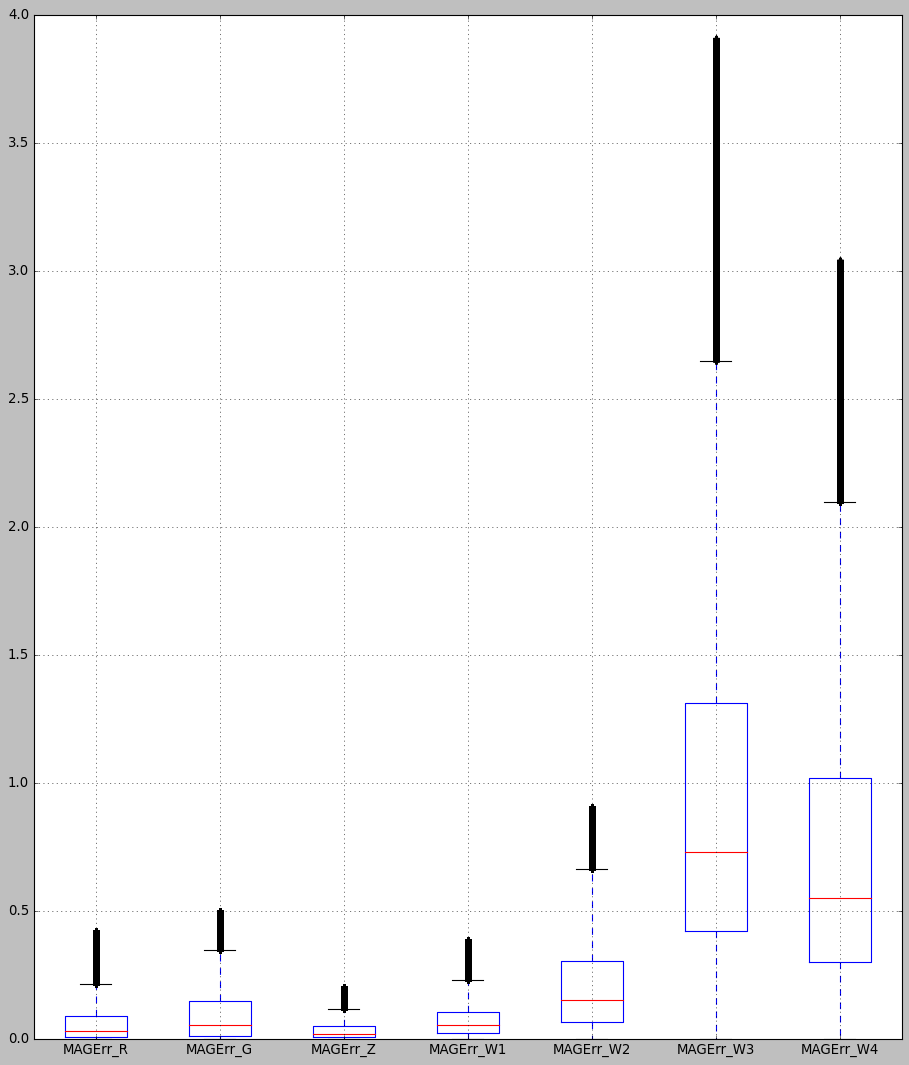

In [11]:
df.boxplot(mag_err_columns, figsize=(14, 16));

## 10) Obtendo a magnitude limite

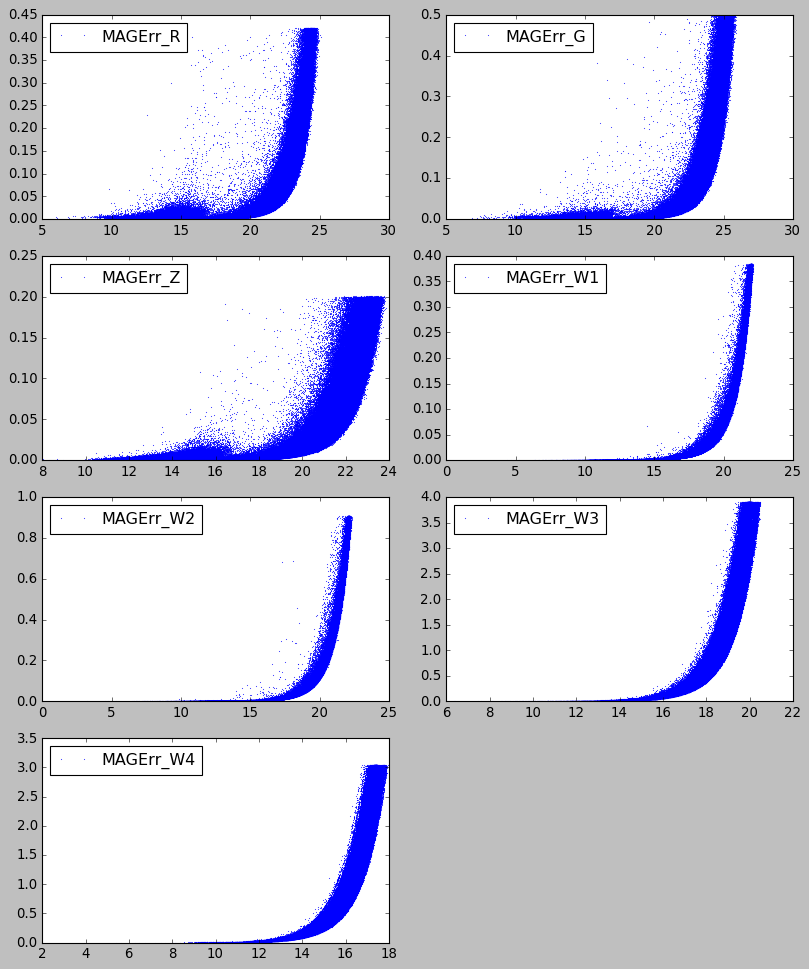

In [12]:
hor = 2
ver = 4

plt.style.use('classic')

# constrained_layout=True evita que as legendas e os títulos dos subplots se sobreponham


# Plot das magnitude vs erro da magnitude em cada banda

fig = plt.figure(figsize=(10, 12), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.1, right=0.5, wspace=0.1)

i = 0

for v in range(ver):
    for h in range(hor):
        if i >= len(colors):
            break
        
        color = colors[i]
        mag_column='MAG_'+color
        mag_err_column='MAGErr_'+color
        
        fig.add_subplot(gs[v, h])
        ax = plt.plot(df[mag_column],
                      df[mag_err_column],
                      '.',
                      color='blue',
                      alpha=0.7,
                      label=mag_err_column,
                      markersize=1)
        plt.legend(loc='upper left')
        
        i += 1


## 11) Obtendo a magnitude limite visualmente para cada banda de observação (G, R, Z, W1, W2, W3, W4)

### 11.a) MAG_G

             MAGErr_mean  MAGErr_min  MAGErr_max
Magnitude_G                                     
7.444678        0.004436    0.000967    0.009808
8.287329        0.004249    0.001766    0.010918
9.397843        0.006797    0.000047    0.018804
10.314616       0.005758    0.000074    0.036066
11.222038       0.004270    0.000077    0.024798
12.154837       0.003984    0.000141    0.073660
13.085222       0.004467    0.000165    0.090183
14.026527       0.005395    0.000176    0.117026
14.980627       0.005626    0.000223    0.151596
15.914102       0.003691    0.000375    0.380729
16.857143       0.001572    0.000385    0.340257
17.819785       0.001674    0.000618    0.392433
18.781032       0.002867    0.001078    0.380271
19.731374       0.005405    0.001724    0.481409
20.691691       0.011261    0.003415    0.457030
21.651069       0.024438    0.006543    0.409977
22.601344       0.054411    0.015485    0.488550
23.533526       0.119397    0.033345    0.484113
24.426612       0.24

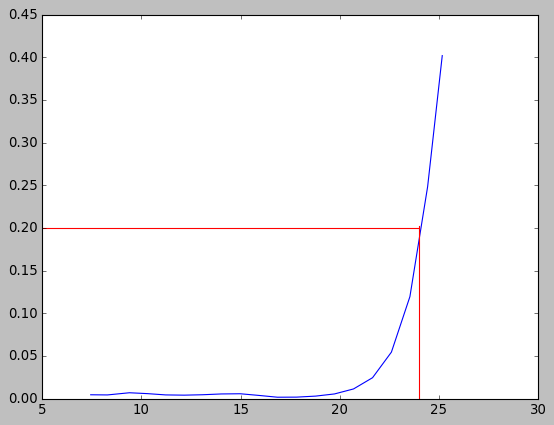

In [13]:
# O comando abaixo obtem a média, o mínimo e o valor máximo de MAGErr para cada bin de magnitude.

df_test = df.groupby(pd.cut(df["MAG_G"], 20))['MAGErr_G'].agg(
        ['mean','min','max']).rename(
        columns = {'mean': 'MAGErr_mean',
                   'min': 'MAGErr_min',
                   'max': 'MAGErr_max'}).rename_axis('Magnitude_G')

# O comando abaixo substituí o intervalo do bin no index para o valor médio da magnitude em cada bin
series_g = df.groupby(pd.cut(df["MAG_G"], 20))['MAG_G'].mean()

mag_g_values = [value for value in series_g.values]

print(df_test.rename(series_g, axis=0))
# O objetivo é obter uma estimativa numérica dos valores próximos de corte

plt.plot(mag_g_values, df_test['MAGErr_mean']);


plt.axvline(x = 24, ymin = 0, ymax = 0.45, color ='red')  # plota uma linha vertical vermelha

plt.axhline(y = 0.2, xmin = 0, xmax = 0.76, color ='red')  # plota uma linha horizontal vermelha
plt.show()

##### Magnitude limite para a banda G: 24

### 11.b) MAG_R

             MAGErr_mean  MAGErr_min  MAGErr_max
Magnitude_R                                     
5.822893        0.002047    0.000944    0.004124
7.108714        0.004715    0.002246    0.007070
7.995687        0.004073    0.001604    0.006847
9.060240        0.005147    0.000034    0.011735
9.969978        0.005063    0.000050    0.066475
10.916463       0.004068    0.000058    0.062777
11.886273       0.004368    0.000102    0.065170
12.854700       0.005461    0.000176    0.229475
13.833784       0.007082    0.000154    0.152661
14.805604       0.007492    0.000241    0.385183
15.765616       0.004312    0.000428    0.400945
16.749445       0.001855    0.000511    0.373267
17.744400       0.002280    0.000736    0.382718
18.730427       0.004027    0.001369    0.371367
19.714099       0.008222    0.002645    0.400972
20.694868       0.017820    0.005412    0.398091
21.663495       0.039939    0.012160    0.405165
22.630672       0.091852    0.029106    0.419124
23.532401       0.19

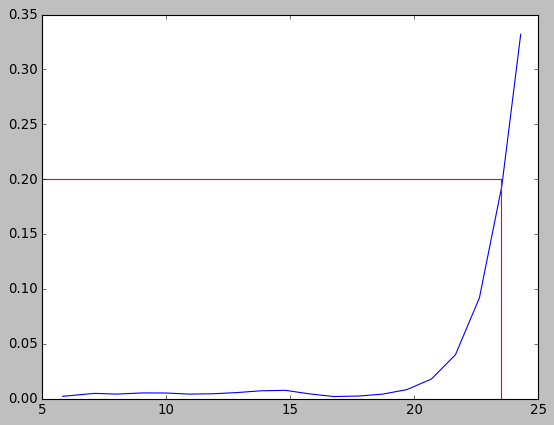

In [14]:
# O comando abaixo obtem a média, o mínimo e o valor máximo de MAGErr para cada bin de magnitude.

df2_test = df.groupby(pd.cut(df["MAG_R"], 20))['MAGErr_R'].agg(
        ['mean','min','max']).rename(
        columns = {'mean': 'MAGErr_mean',
                   'min': 'MAGErr_min',
                   'max': 'MAGErr_max'}).rename_axis('Magnitude_R')

# O comando abaixo substituí o intervalo do bin no index para o valor médio da magnitude em cada bin
series_r = df.groupby(pd.cut(df["MAG_R"], 20))['MAG_R'].mean()

mag_r_values = [value for value in series_r.values]

print(df2_test.rename(series_r, axis=0))
# O objetivo é obter uma estimativa numérica dos valores próximos de corte

plt.plot(mag_r_values, df2_test['MAGErr_mean']);


plt.axvline(x = 23.5, ymin = 0, ymax = 0.57, color ='red')

plt.axhline(y = 0.2, xmin = 0, xmax = 0.925, color ='red')
plt.show()


##### Magnitude limite para a banda R: 23.5

### 11.c) MAG_Z

In [15]:
# O comando abaixo obtem a média, o mínimo e o valor máximo de MAGErr para cada bin de magnitude.

df3_test = df.groupby(pd.cut(df["MAG_Z"], 20))['MAGErr_Z'].agg(
        ['mean','min','max']).rename(
        columns = {'mean': 'MAGErr_mean',
                   'min': 'MAGErr_min',
                   'max': 'MAGErr_max'}).rename_axis('Magnitude_Z')

# O comando abaixo substituí o intervalo do bin no index para o valor médio da magnitude em cada bin
series_z = df.groupby(pd.cut(df["MAG_Z"], 20))['MAG_Z'].mean()

mag_z_values = [value for value in series_z.values]

print(df3_test.rename(series_z, axis=0))
# O objetivo é obter uma estimativa numérica dos valores próximos de corte

             MAGErr_mean  MAGErr_min  MAGErr_max
Magnitude_Z                                     
8.336262        0.000867    0.000018    0.001681
8.941196        0.000032    0.000032    0.000032
10.262168       0.001146    0.000541    0.002901
10.939498       0.001196    0.000070    0.009061
11.654965       0.001442    0.000143    0.009895
12.413442       0.001853    0.000150    0.018775
13.204421       0.002444    0.000175    0.040374
13.993728       0.003185    0.000235    0.023599
14.780269       0.003802    0.000310    0.063116
15.570244       0.002985    0.000168    0.107650
16.356305       0.001463    0.000434    0.191105
17.154467       0.001588    0.000593    0.185350
17.950899       0.002612    0.000952    0.180448
18.742223       0.004813    0.001709    0.185060
19.531028       0.009317    0.002761    0.181213
20.313523       0.018449    0.005834    0.198477
21.091394       0.036746    0.010481    0.197780
21.870418       0.072094    0.022772    0.200292
22.617057       0.12

Como o teto de magnitude de Z se encontra com MAGErr_mean < 0.2, podemos dizer que a magnitude limite é portanto 23.2


#### Magnitude limite para a banda Z: 23.2

### 11.d) MAG_W1

              MAGErr_mean  MAGErr_min  MAGErr_max
Magnitude_W1                                     
4.810276         0.000129    0.000086    0.000185
6.517052         0.000127    0.000102    0.000195
7.452611         0.000172    0.000119    0.000331
8.646273         0.000269    0.000144    0.000969
9.823314         0.000412    0.000165    0.001255
10.941649        0.000302    0.000174    0.001687
12.133813        0.000429    0.000300    0.003588
13.307885        0.000771    0.000254    0.008771
14.514872        0.001436    0.000503    0.067147
15.681355        0.002751    0.000884    0.032935
16.874647        0.005860    0.002442    0.054655
18.086292        0.014141    0.006412    0.078888
19.238700        0.035512    0.016171    0.276256
20.326978        0.090751    0.041086    0.380134
21.374119        0.228607    0.111908    0.383752


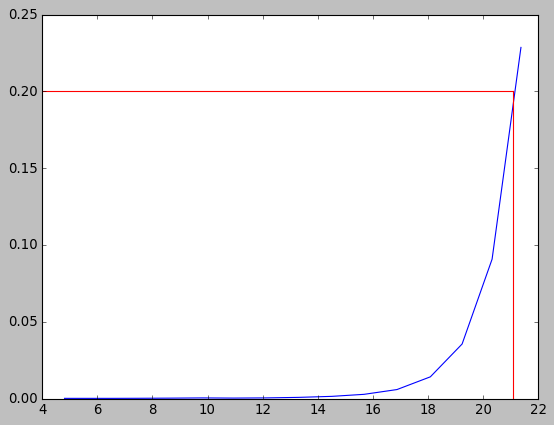

In [16]:
# O comando abaixo obtem a média, o mínimo e o valor máximo de MAGErr para cada bin de magnitude.

df4_test = df.groupby(pd.cut(df["MAG_W1"], 15))['MAGErr_W1'].agg(
        ['mean','min','max']).rename(
        columns = {'mean': 'MAGErr_mean',
                   'min': 'MAGErr_min',
                   'max': 'MAGErr_max'}).rename_axis('Magnitude_W1')

# O comando abaixo substituí o intervalo do bin no index para o valor médio da magnitude em cada bin
series_w1 = df.groupby(pd.cut(df["MAG_W1"], 15))['MAG_W1'].mean()

mag_w1_values = [value for value in series_w1.values]

print(df4_test.rename(series_w1, axis=0))
# O objetivo é obter uma estimativa numérica dos valores próximos de corte

plt.plot(mag_w1_values, df4_test['MAGErr_mean']);


plt.axvline(x = 21.1, ymin = 0, ymax = 0.8, color ='red')

plt.axhline(y = 0.2, xmin = 0, xmax = 0.95, color ='red')
plt.show()


#### Magnitude limite para a banda W1: 21.1

### 11.e) MAG_W2

              MAGErr_mean  MAGErr_min  MAGErr_max
Magnitude_W2                                     
3.239214         0.000095    0.000095    0.000095
4.876929         0.000278    0.000151    0.000424
6.765181         0.000326    0.000236    0.000457
7.779862         0.000520    0.000254    0.001508
9.078667         0.000733    0.000476    0.002122
10.355042        0.001189    0.000451    0.010606
11.615970        0.000670    0.000380    0.009170
12.860971        0.000946    0.000545    0.009471
14.120653        0.001869    0.001200    0.064037
15.415146        0.003933    0.001410    0.093928
16.670980        0.009137    0.003383    0.246255
17.968835        0.024991    0.010402    0.687566
19.244964        0.073042    0.029307    0.418933
20.415807        0.206014    0.090432    0.831422
21.496440        0.538220    0.266939    0.905876


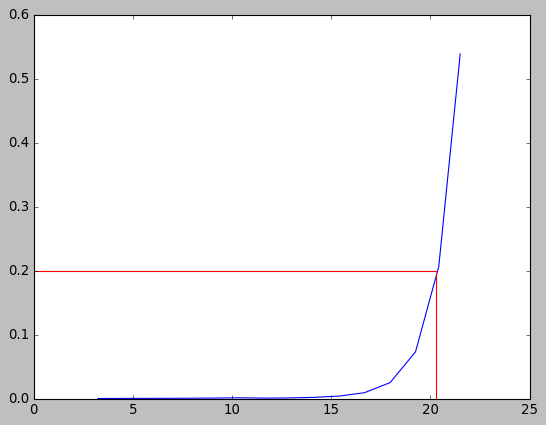

In [17]:
# O comando abaixo obtem a média, o mínimo e o valor máximo de MAGErr para cada bin de magnitude.

df5_test = df.groupby(pd.cut(df["MAG_W2"], 15))['MAGErr_W2'].agg(
        ['mean','min','max']).rename(
        columns = {'mean': 'MAGErr_mean',
                   'min': 'MAGErr_min',
                   'max': 'MAGErr_max'}).rename_axis('Magnitude_W2')

# O comando abaixo substituí o intervalo do bin no index para o valor médio da magnitude em cada bin
series_w2 = df.groupby(pd.cut(df["MAG_W2"], 15))['MAG_W2'].mean()

mag_w2_values = [value for value in series_w2.values]

print(df5_test.rename(series_w2, axis=0))
# O objetivo é obter uma estimativa numérica dos valores próximos de corte

plt.plot(mag_w2_values, df5_test['MAGErr_mean']);


plt.axvline(x = 20.3,ymin = 0, ymax = 0.326, color ='red')

plt.axhline(y = 0.2, xmin = 0, xmax = 0.812,color ='red')
plt.show()


#### Magnitude limite para a banda W2: 20.3

### 11.f) MAG_W3

              MAGErr_mean  MAGErr_min  MAGErr_max
Magnitude_W3                                     
6.363072         0.000098    0.000087    0.000109
7.899662         0.000105    0.000062    0.000134
8.798547         0.000160    0.000098    0.000340
9.666866         0.000363    0.000185    0.001282
10.670848        0.000909    0.000429    0.005488
11.622775        0.002066    0.000830    0.008217
12.543612        0.004630    0.001705    0.014696
13.487585        0.011260    0.004503    0.042080
14.436272        0.026253    0.009616    0.097719
15.398059        0.062593    0.022756    0.296374
16.370826        0.149864    0.053203    0.475555
17.300899        0.344168    0.119012    1.148999
18.139455        0.726170    0.277485    2.663201
19.032102        1.633081    0.656072    3.899795
19.791978        3.071816    1.563706    3.906560


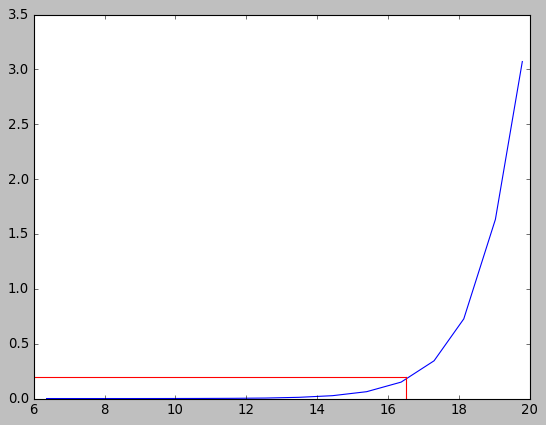

In [18]:
# O comando abaixo obtem a média, o mínimo e o valor máximo de MAGErr para cada bin de magnitude.

df6_test = df.groupby(pd.cut(df["MAG_W3"], 15))['MAGErr_W3'].agg(
        ['mean','min','max']).rename(
        columns = {'mean': 'MAGErr_mean',
                   'min': 'MAGErr_min',
                   'max': 'MAGErr_max'}).rename_axis('Magnitude_W3')

# O comando abaixo substituí o intervalo do bin no index para o valor médio da magnitude em cada bin
series_w3 = df.groupby(pd.cut(df["MAG_W3"], 15))['MAG_W3'].mean()

mag_w3_values = [value for value in series_w3.values]

print(df6_test.rename(series_w3, axis=0))
# O objetivo é obter uma estimativa numérica dos valores próximos de corte

plt.plot(mag_w3_values, df6_test['MAGErr_mean']);


plt.axvline(x = 16.5, ymin = 0, ymax = 0.055, color ='red')

plt.axhline(y = 0.2, xmin = 0, xmax = 0.75,color ='red')
plt.show()


#### Magnitude limite para a banda W3: 16.5

### 11.g) MAG_W4

              MAGErr_mean  MAGErr_min  MAGErr_max
Magnitude_W4                                     
3.940363         0.000010    0.000010    0.000010
5.508182         0.000095    0.000054    0.000135
6.501226         0.000136    0.000077    0.000222
7.449665         0.000273    0.000195    0.000392
8.244008         0.000646    0.000390    0.000956
9.261498         0.001892    0.000733    0.006780
10.072422        0.004013    0.001792    0.007001
11.063693        0.010021    0.003448    0.028082
12.027308        0.023847    0.008705    0.057494
12.933474        0.054062    0.018849    0.150998
13.840113        0.122704    0.042981    0.404957
14.743402        0.277102    0.100938    0.753944
15.604825        0.598539    0.231191    1.596513
16.490603        1.332111    0.545295    3.038856
17.229266        2.430856    1.271552    3.039408


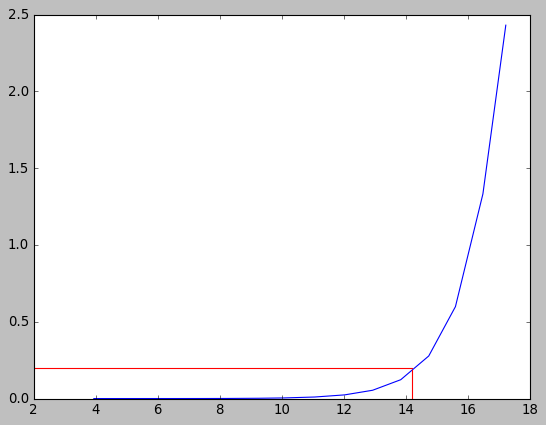

In [19]:
df7_test = df.groupby(pd.cut(df["MAG_W4"], 15))['MAGErr_W4'].agg(
        ['mean','min','max']).rename(
        columns = {'mean': 'MAGErr_mean',
                   'min': 'MAGErr_min',
                   'max': 'MAGErr_max'}).rename_axis('Magnitude_W4')

# O comando abaixo substituí o intervalo do bin no index para o valor médio da magnitude em cada bin
series_w4 = df.groupby(pd.cut(df["MAG_W4"], 15))['MAG_W4'].mean()

mag_w4_values = [value for value in series_w4.values]

print(df7_test.rename(series_w4, axis=0))
# O objetivo é obter uma estimativa numérica dos valores próximos de corte

plt.plot(mag_w4_values, df7_test['MAGErr_mean']);


plt.axvline(x = 14.2, ymin = 0, ymax = 0.074, color ='red')

plt.axhline(y = 0.2, xmin = 0, xmax = 0.762, color ='red')
plt.show()

#### Magnitude limite para a banda W4: 14.2

## As magnitudes limites encontradas para as bandas R, G, Z, W1, W2, W3 e W4 são:

<ul>
  <li>R: 23.5</li>
  <li>G: 24</li>
  <li>Z: 23.2</li>
  <li>W1: 21.1</li>
  <li>W2: 20.3</li>
  <li>W3: 16.5</li>
  <li>W4: 14.2</li>
</ul>

## 12) Finalizamos com o plot das Magnitudes, com o corte apropriado

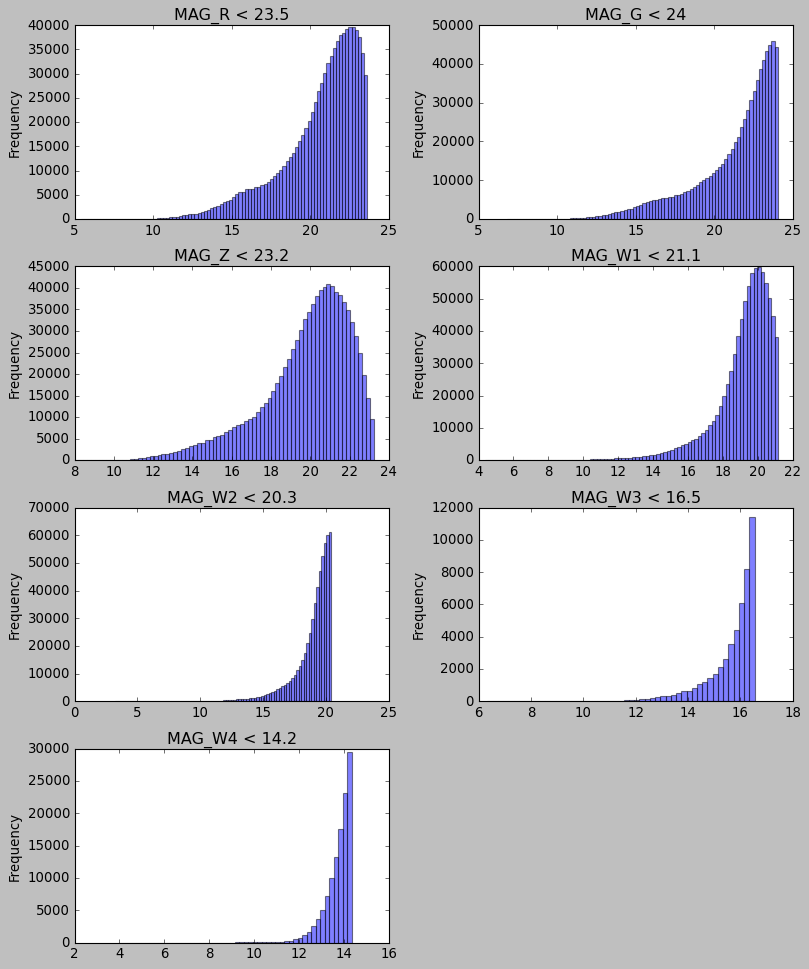

In [20]:
hor = 2
ver = 4
colors = ['R', 'G', 'Z', 'W1', 'W2', 'W3', 'W4']
mag_lim = [23.5, 24, 23.2, 21.1, 20.3, 16.5, 14.2]

# constrained_layout = True evita que as legendas e os títulos dos subplots se sobreponham

fig = plt.figure(figsize=(10, 12), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.1, right=0.5, wspace=0.1)

binsize = .2
i = 0

for v in range(ver):
    for h in range(hor):
        if i >= len(colors):
            break
        
        color = colors[i]
        mag_column='MAG_'+color
        
        fig.add_subplot(gs[v, h])
        bins0 = binarange(df[df[mag_column]<mag_lim[i]][mag_column], binsize)
        ax = df[mag_column].plot.hist(bins=bins0, color='blue', alpha=0.5, label=mag_column)
        ax.set_title(mag_column+" < "+str(mag_lim[i]))
        i += 1

        